In [93]:
import pandas as pd

# Load menu sales data
df = pd.read_csv(r'C:\Users\vegan\OneDrive\Desktop\Chicana\Sales\Chicana Sales by Item 2023-2025 Master.csv', encoding='latin1')


# Data Preview
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(172478, 9)
   Order #       Order Date      Menu Item       Menu Group             Menu  \
0    114.0  6/29/2025 18:48      Horchata*   Aguas | Drinks   Aguas | Drinks   
1    113.0  6/29/2025 18:47     Asada Taco     Street Tacos     Street Tacos   
2    113.0  6/29/2025 18:47  Carnitas Taco     Street Tacos     Street Tacos   
3    113.0  6/29/2025 18:47  Mexgogi Fries  Signature Fries  Signature Fries   
4    112.0  6/29/2025 18:46  Mexgogi Fries  Signature Fries  Signature Fries   

  Sales Category Net Price  Qty  Void?  
0         Drinks      5.25  1.0  False  
1           Food      3.75  1.0  False  
2           Food      3.75  1.0  False  
3           Food     15.25  1.0  False  
4           Food     15.25  1.0  False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172478 entries, 0 to 172477
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Order #         166615 non-null  float64
 1   Order Da

In [95]:
# Convert Net Price to numeric
df['Net Price'] = df['Net Price'].replace(r'[\$,]', '', regex=True).astype(float)

In [97]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [99]:
# Remove voided transactions
df = df[df['Void?'] == False]

In [103]:
# Drop Unnecessary Columns
df = df.drop(columns=['Order #', 'Void?'])

In [107]:
# Handle missing values
df.dropna(subset=['Menu Item', 'Net Price', 'Qty'], inplace=True)

In [111]:
# Create time feature
df['DayOfWeek'] = df['Order Date'].dt.day_name()
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [115]:
# Convert if order date include time
df['Hour'] = df['Order Date'].dt.hour

In [117]:
# Preview first five rows
df.head()

,Order Date,Menu Item,Menu Group,Menu,Sales Category,Net Price,Qty,DayOfWeek,Month,Year,Hour
0,2025-06-29 18:48:00,Horchata*,Aguas | Drinks,Aguas | Drinks,Drinks,5.25,1.0,Sunday,6,2025,18
1,2025-06-29 18:47:00,Asada Taco,Street Tacos,Street Tacos,Food,3.75,1.0,Sunday,6,2025,18
2,2025-06-29 18:47:00,Carnitas Taco,Street Tacos,Street Tacos,Food,3.75,1.0,Sunday,6,2025,18
3,2025-06-29 18:47:00,Mexgogi Fries,Signature Fries,Signature Fries,Food,15.25,1.0,Sunday,6,2025,18
4,2025-06-29 18:46:00,Mexgogi Fries,Signature Fries,Signature Fries,Food,15.25,1.0,Sunday,6,2025,18


In [119]:
# Check columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171337 entries, 0 to 172477
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Order Date      171337 non-null  datetime64[ns]
 1   Menu Item       171337 non-null  object        
 2   Menu Group      169650 non-null  object        
 3   Menu            169650 non-null  object        
 4   Sales Category  170850 non-null  object        
 5   Net Price       171337 non-null  float64       
 6   Qty             171337 non-null  float64       
 7   DayOfWeek       171337 non-null  object        
 8   Month           171337 non-null  int32         
 9   Year            171337 non-null  int32         
 10  Hour            171337 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(5)
memory usage: 13.7+ MB


In [121]:
# Show sample rows randomly
df.sample(5)

,Order Date,Menu Item,Menu Group,Menu,Sales Category,Net Price,Qty,DayOfWeek,Month,Year,Hour
22044,2025-03-08 18:36:00,Taquitos (3),Chicana Grub,Chicana Grub,Food,15.75,1.0,Saturday,3,2025,18
41584,2024-11-19 14:43:00,Asada Taco,Taco Tuesday,Taco Tuesday,Food,2.75,1.0,Tuesday,11,2024,14
93213,2024-03-11 19:12:00,Chili Burger & Fries,Burgers & Melts,Burgers & Melts,Food,17.95,1.0,Monday,3,2024,19
100658,2024-02-10 12:03:00,Cali Dreamin' Burger & Fries,Burgers & Melts,Burgers & Melts,Food,17.95,1.0,Saturday,2,2024,12
57048,2024-08-28 14:03:00,Mex Quesadilla,Chicana Grub,Chicana Grub,Food,12.23,1.0,Wednesday,8,2024,14


In [123]:
# Remove duplicate column
df.drop(columns=['Menu'], inplace=True)

In [127]:
# Show sample rows randomly
df.sample(5)

,Order Date,Menu Item,Menu Group,Sales Category,Net Price,Qty,DayOfWeek,Month,Year,Hour
274,2025-06-29 12:08:00,Chili Cheese Fries,Signature Fries,Food,15.25,1.0,Sunday,6,2025,12
16961,2025-04-04 18:34:00,Carnitas Taco,Street Tacos,Food,3.25,1.0,Friday,4,2025,18
16326,2025-04-06 17:36:00,Horchata,Aguas | Drinks,Drinks,5.25,1.0,Sunday,4,2025,17
14071,2025-04-18 17:24:00,Horchata,Aguas | Drinks,Drinks,5.25,1.0,Friday,4,2025,17
102317,2024-02-02 13:00:00,Jr. Chickn Nuggets & Fries,Ryahs Kid Menu,Food,15.75,1.0,Friday,2,2024,13


In [129]:
# Clean special characters
# Example: Clean 'Menu Item' column
df['Menu Item'] = df['Menu Item'].str.encode('ascii', errors='ignore').str.decode('ascii')

In [131]:
# Show sample rows randomly
df.sample(5)

,Order Date,Menu Item,Menu Group,Sales Category,Net Price,Qty,DayOfWeek,Month,Year,Hour
79431,2024-05-11 14:25:00,El Classico,Chicana Grub,Food,13.00,1.0,Saturday,5,2024,14
10115,2025-05-09 12:30:00,Horchata*,Aguas | Drinks,Drinks,3.05,1.0,Friday,5,2025,12
98884,2024-02-17 15:02:00,Carnitas Taco,Street Tacos,Food,11.25,3.0,Saturday,2,2024,15
75870,2024-05-26 13:26:00,Signature Fries,Signature Fries,Food,16.75,1.0,Sunday,5,2024,13
171522,2023-04-04 14:06:00,Season Fries,Sides,Appetizers,5.00,1.0,Tuesday,4,2023,14


In [138]:
# Confirm special character in Ryahs Menu is gone
df[df['Menu Item'].str.contains('Ryah', na=False)]

,Order Date,Menu Item,Menu Group,Sales Category,Net Price,Qty,DayOfWeek,Month,Year,Hour


<Axes: title={'center': 'Top 10 Menu Items by Quantity Sold'}, xlabel='Menu Item'>

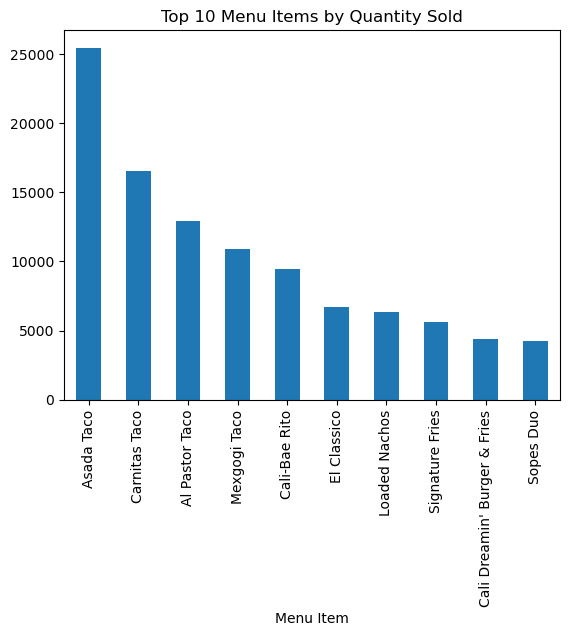

In [143]:
# Show top 10 menu items
top_items = df.groupby('Menu Item')['Qty'].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', title='Top 10 Menu Items by Quantity Sold')

<Axes: title={'center': 'Total Sales by Day of Week'}, xlabel='DayOfWeek'>

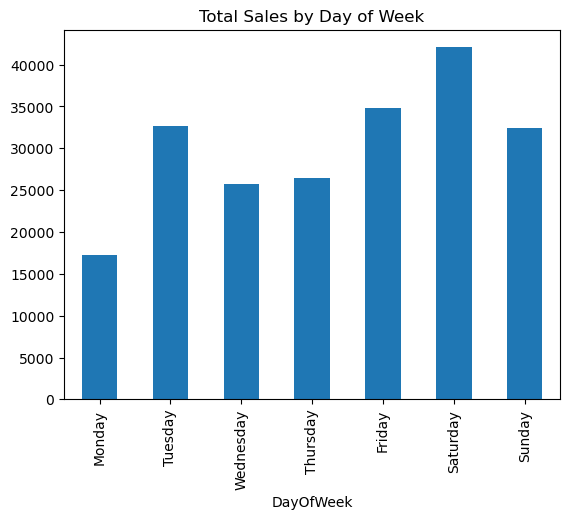

In [145]:
# Sales by day of the week
df.groupby('DayOfWeek')['Qty'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', title='Total Sales by Day of Week')

In [171]:
# Loop through all object-type columns and remove curly quotes
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace(r"[’‘´`]", "'", regex=True)
    df[col] = df[col].str.encode('ascii', errors='ignore').str.decode('ascii')

<Axes: title={'center': 'Revenue by Menu Group'}, xlabel='Menu Group'>

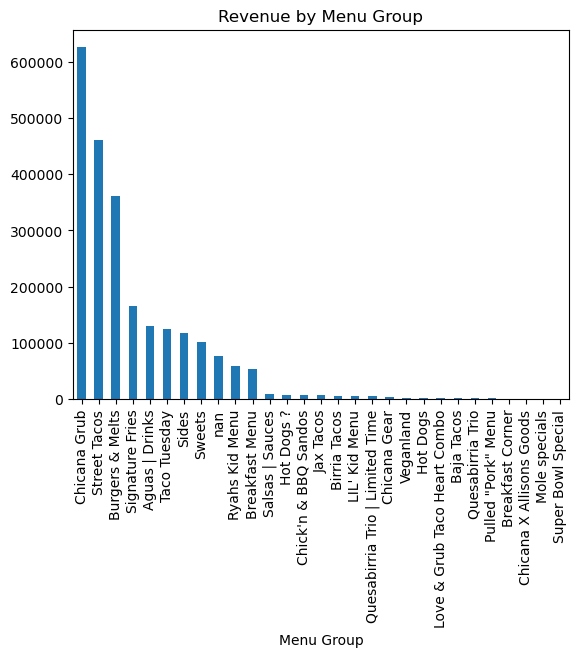

In [173]:
# Clean All Text Columns in the DataFrame
df['Revenue'] = df['Qty'] * df['Net Price']

df.groupby('Menu Group')['Revenue'].sum().sort_values(ascending=False).plot(
    kind='bar', title='Revenue by Menu Group'
)

In [260]:
# remove nan and/ or Nan
df = df[df['Sales Category'].astype(str).str.lower() != 'nan']

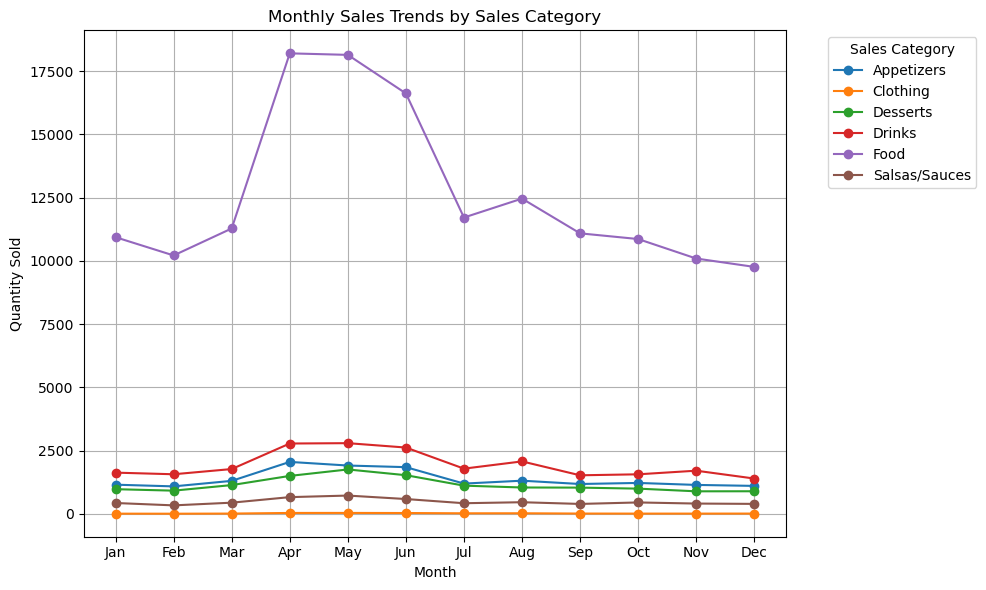

In [262]:
# Step 1: Drop rows with missing Sales Category
df = df.dropna(subset=['Sales Category'])

# Step 2: Group data AFTER cleaning
category_month = (
    df.groupby(['Sales Category', 'Month'])['Qty']
    .sum()
    .unstack()
    .fillna(0)  # fill missing combinations with 0
)

# Step 3: Plot
import matplotlib.pyplot as plt

ax = category_month.T.plot(kind='line', marker='o', figsize=(10, 6))

ax.set_title('Monthly Sales Trends by Sales Category')
ax.set_xlabel('Month')
ax.set_ylabel('Quantity Sold')
ax.legend(title='Sales Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Decision Tree Regressor

In [294]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [296]:
# select features and targets
features = ['Net Price', 'Month', 'DayOfWeek', 'Sales Category']
target = 'Qty'

In [298]:
# Select only relevant columns
features = ['Net Price', 'Month', 'DayOfWeek', 'Sales Category']
target = 'Qty'

# Create a copy of your working DataFrame
df_model = df[features + [target]].copy()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['DayOfWeek', 'Sales Category']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le


In [300]:
# split data
from sklearn.model_selection import train_test_split

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [302]:
# Update features
features = ['Net Price', 'Month', 'DayOfWeek', 'Sales Category', 'Menu Item']
target = 'Qty'

In [304]:
# encode columns
df_model = df[features + [target]].copy()

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['DayOfWeek', 'Sales Category', 'Menu Item']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le


In [306]:
# split data
from sklearn.model_selection import train_test_split

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [308]:
# train model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Baseline Model Results (with Menu Item):")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Baseline Model Results (with Menu Item):
Mean Squared Error (MSE): 0.06
R² Score: 0.89


In [313]:
# Random Forest Regressor

In [315]:
#import model
from sklearn.ensemble import RandomForestRegressor

In [317]:
# train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [318]:
# evaluate model
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Results:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Random Forest Model Results:
Mean Squared Error (MSE): 0.05
R² Score: 0.92


In [321]:
# Feature Importance Plot: Shows which features had the biggest impact on predicting quantity sold

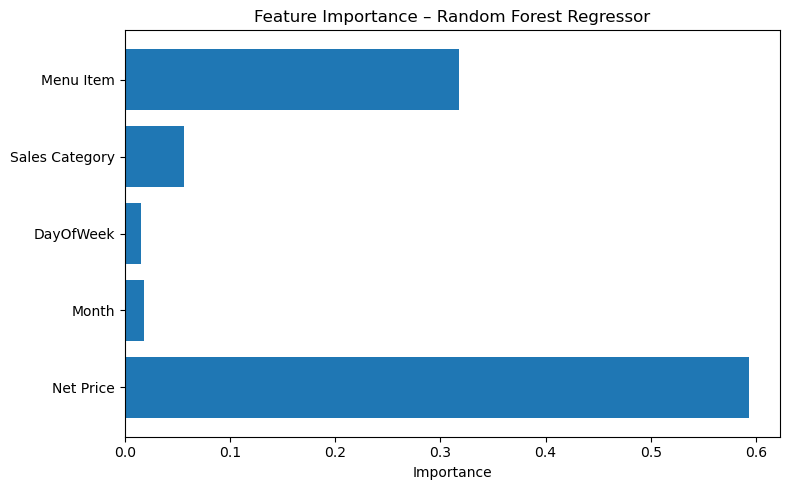

In [325]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.title('Feature Importance – Random Forest Regressor')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
#
To predict the number of menu items sold (Qty), I used regression models because the target variable is numeric. As a baseline model, I selected a 
Decision Tree Regressor due to its ease and ability to handle both categorical and numerical features without scaling. I improved performance by 
using a Random Forest Regressor, an ensemble method that reduces overfitting and typically provides more accurate predictions.

Results
Baseline (Decision Tree):

R² Score: 0.89

MSE: 0.06

Improved Model (Random Forest):

R² Score: 0.92

MSE: 0.05

These results show that the Random Forest model provides a strong fit, explaining 92% of the variance in quantity sold with minimal error. This model 
will serve as the foundation for further tuning and evaluation in the final module.